1. Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.


Для решения задачи был взят датасет о данных COVID-19

In [385]:

import pandas as pd

data = pd.read_csv('Covid_Data.csv')


В логических функциях 1 означает «да», а 2 означает «нет». 

• SEX: 1 для женщин и 2 для мужчин.

• AGE: пациента.

• CLASIFFICATION_FINAL: результаты тестов covid. Значения 1-3 означают, что у пациента диагностировали ковид в разной степени.
4 или выше означает, что пациент не является носителем ковида или что тест не дает результатов.

• PATIENT_TYPE: тип лечения, полученного пациентом в отделении. 1 для возвращения домой и 2 для госпитализации.

• PNEUMONIA: есть ли у пациента уже воспаление воздухоносных мешков или нет.

• PREGNANT: беременна пациентка или нет.

• DIABETES: есть ли у пациента диабет или нет.

• COPD: Указывает, есть ли у пациента хроническая обструктивная болезнь легких или нет.

• ASTHMA: есть ли у пациента астма или нет.

• INMSUPR: есть ли у пациента иммуносупрессия или нет.

• HIPERTENSION: есть ли у пациента гипертония или нет.

• CARDIOVASCULAR: есть ли у пациента заболевания, связанные с сердцем или кровеносными сосудами.

• RENAL_CHRONIC: имеет ли пациент хроническую почечную болезнь или нет.

• OTHER_DISEASE: есть ли у пациента другое заболевание или нет.

• OBESITY: страдает ли пациент ожирением или нет.

• TOBACCO: является ли пациент курильщиком.

• USMER: Указывает, лечился ли пациент в медсанчастях первого, второго или третьего уровня.

• MEDICAL_UNIT: тип учреждения национальной системы здравоохранения, предоставившего помощь.

• INTUBED: был ли пациент подключен к аппарату искусственной вентиляции легких.

• ICU: указывает, был ли пациент госпитализирован в отделение интенсивной терапии.

• DATE_DIED: Если пациент умер, укажите дату смерти, иначе 9999-99-99.


In [270]:
data.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [291]:
data.loc[(data['DATE_DIED'] == "9999-99-99" ), 'DATE_DIED'] = "0"

In [292]:
data.loc[ (data["DATE_DIED"] != "0" ), 'DATE_DIED'] = "1"

In [293]:
data.head(n=100)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,1,0,1,65,2,2,...,2,2,1,2,2,2,2,2,3,0
1,2,1,2,1,1,0,1,72,0,2,...,2,2,1,2,2,1,1,2,5,0
2,2,1,2,2,1,1,2,55,0,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,1,0,2,53,2,2,...,2,2,2,2,2,2,2,2,7,0
4,2,1,2,1,1,0,2,68,0,1,...,2,2,1,2,2,2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1,1,1,0,0,2,49,2,2,...,2,2,2,2,2,2,2,2,7,0
96,2,1,1,1,0,0,2,24,2,2,...,2,2,2,2,2,2,2,2,7,0
97,2,1,2,1,0,0,2,28,0,2,...,2,2,2,2,2,2,2,2,7,0
98,2,1,2,1,0,0,2,27,0,2,...,2,2,2,2,2,2,2,1,7,0


In [294]:
data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.00000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.00000,3693.000000,3693.000000,3693.000000
mean,1.454644,2.872461,1.551584,1.549147,3.433523,2.02410,50.704305,0.892499,2.070133,2.262930,2.281072,2.342811,2.024100,2.516112,2.296507,2.040617,2.29055,2.318170,3.499052,3.513675
std,0.498006,0.439433,0.497399,0.497646,15.556810,7.17429,18.180278,0.992704,5.494675,5.235662,5.468670,5.903430,5.499258,7.223830,5.692469,4.760001,5.69330,6.116669,1.407999,15.546636
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,39.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,0.000000
50%,1.000000,3.000000,2.000000,2.000000,1.000000,1.00000,51.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,1.000000
75%,2.000000,3.000000,2.000000,2.000000,2.000000,2.00000,63.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,2.000000
max,2.000000,3.000000,2.000000,2.000000,99.000000,99.00000,103.000000,2.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,7.000000,99.000000


In [295]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 3693 non-null   int64 
 1   MEDICAL_UNIT          3693 non-null   int64 
 2   SEX                   3693 non-null   int64 
 3   PATIENT_TYPE          3693 non-null   int64 
 4   DATE_DIED             3693 non-null   object
 5   INTUBED               3693 non-null   int64 
 6   PNEUMONIA             3693 non-null   int64 
 7   AGE                   3693 non-null   int64 
 8   PREGNANT              3693 non-null   int64 
 9   DIABETES              3693 non-null   int64 
 10  COPD                  3693 non-null   int64 
 11  ASTHMA                3693 non-null   int64 
 12  INMSUPR               3693 non-null   int64 
 13  HIPERTENSION          3693 non-null   int64 
 14  OTHER_DISEASE         3693 non-null   int64 
 15  CARDIOVASCULAR        3693 non-null   

In [296]:
data.nunique()

USMER                    2
MEDICAL_UNIT             3
SEX                      2
PATIENT_TYPE             2
DATE_DIED                2
INTUBED                  4
PNEUMONIA                3
AGE                     98
PREGNANT                 3
DIABETES                 3
COPD                     3
ASTHMA                   3
INMSUPR                  3
HIPERTENSION             3
OTHER_DISEASE            3
CARDIOVASCULAR           3
OBESITY                  3
RENAL_CHRONIC            3
TOBACCO                  3
CLASIFFICATION_FINAL     7
ICU                      4
dtype: int64

Значения 97 и 98 в некоторых столбцах означают, что значения отсутсвуют, заменим их на 0

In [297]:
data.loc[data['INTUBED'] ==97, 'INTUBED'] = 0
data.loc[(data['INTUBED'] ==98), 'INTUBED'] = 0

In [298]:
data.loc[(data["PREGNANT"] == 97), 'PREGNANT'] = 0
data.loc[(data["PREGNANT"] == 98), 'PREGNANT'] = 0

In [299]:
data.loc[(data["ICU"] == 97), 'ICU'] = 0
data.loc[(data["ICU"] == 98), 'ICU'] = 0

2. Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

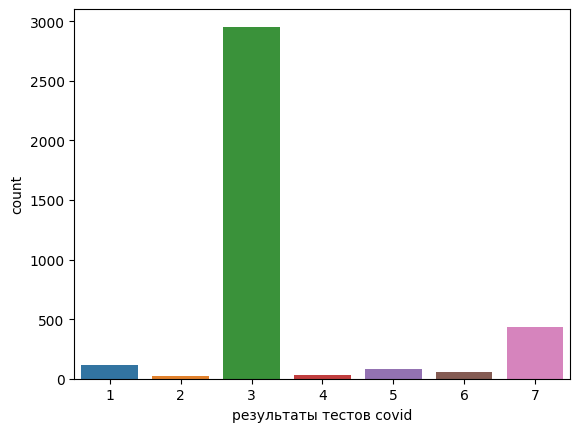

In [301]:
sns.countplot(x='CLASIFFICATION_FINAL', data=data)
plt.xlabel("результаты тестов covid")
plt.show()

Больше всего человек попадают в категории 3 и 7. 
3 - у пациента диагностировали ковид в разной
степени
7 - пациент не является носителем ковида или что тест не дает результатов

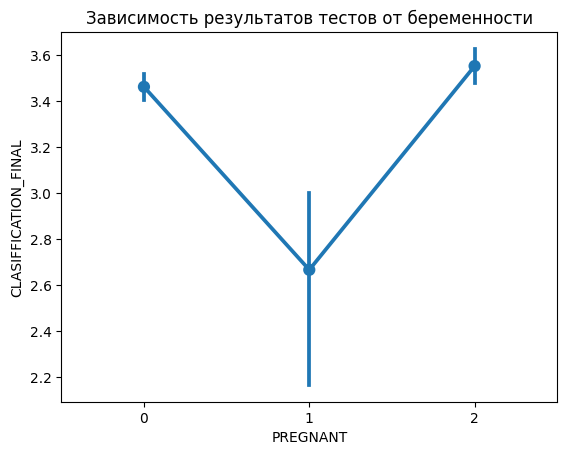

In [302]:
sns.pointplot(y="CLASIFFICATION_FINAL", x="PREGNANT", data=data)
plt.title('Зависимость результатов тестов от беременности')
plt.show()

По графику видно, что результаты тестов не беременных показывали либо отрицательный результат, либо тест не давал результатов. (значения 97 и 98 означают отсутствие данных)

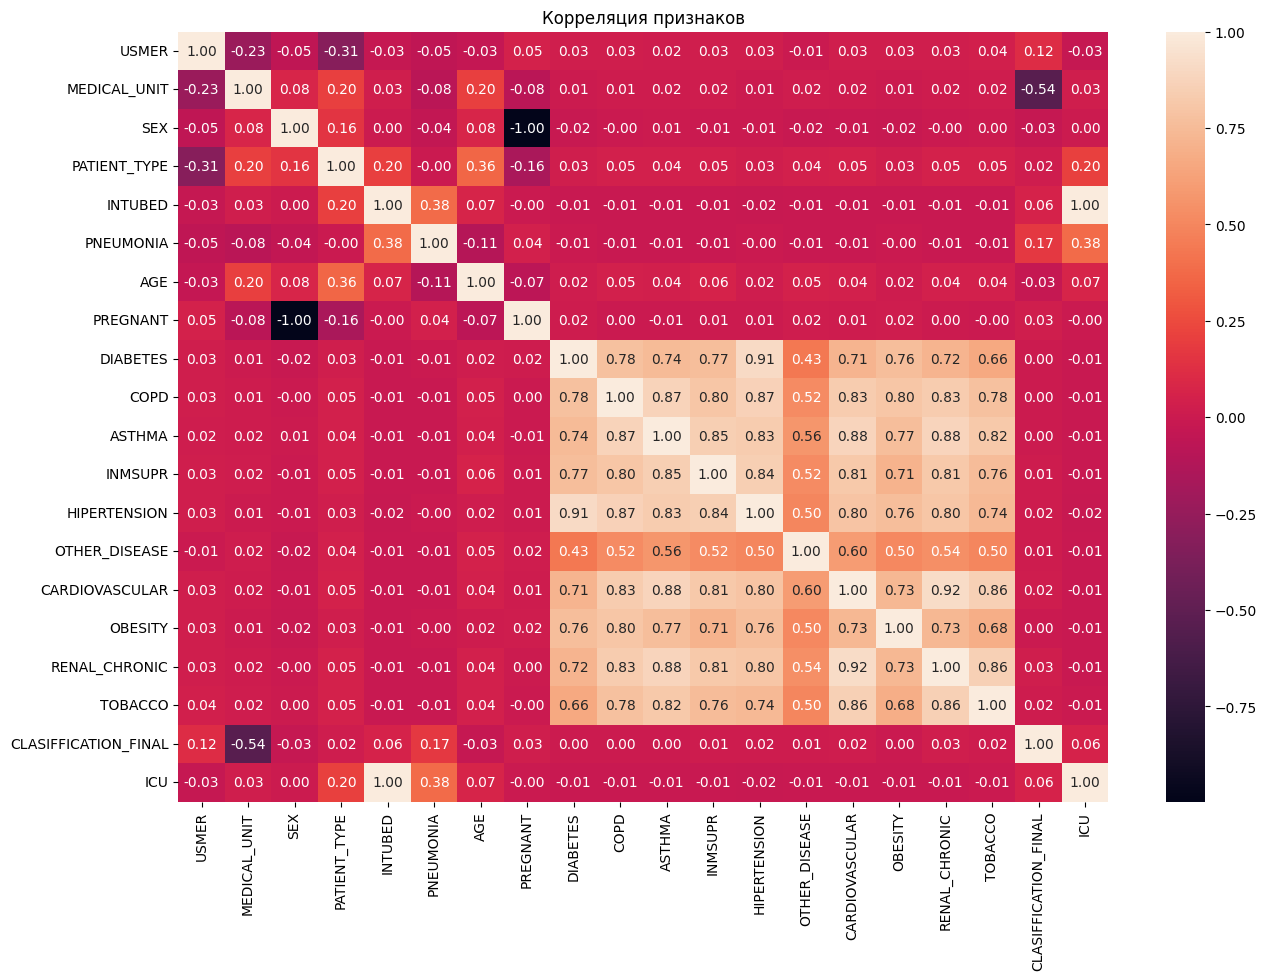

In [303]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(numeric_only = True), annot=True, fmt='.2f')
plt.title('Корреляция признаков')
plt.show()

3. При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

Избавимся от отсутсвующих данных

In [304]:
data.groupby('AGE')['INTUBED'].mean() 

AGE
0       8.000000
1      10.043478
2      25.625000
3       0.333333
4      11.777778
         ...    
93      2.000000
95      1.000000
97      1.333333
100     0.000000
103     2.000000
Name: INTUBED, Length: 98, dtype: float64

In [305]:
data.loc[(data['INTUBED'].isnull()) & (data['AGE'] == 0), 'INTUBED'] = 26
data.loc[(data['INTUBED'].isnull()) & (data['AGE'] == 1), 'INTUBED'] = 63
data.loc[(data['INTUBED'].isnull()) & (data['AGE'] > 2), 'INTUBED'] = 75
data.loc[(data['INTUBED'].isnull()) & (data['AGE'] > 20), 'INTUBED'] = 97
data['INTUBED'].isnull().any() 

False

4. Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

Разделим выборку на обучающую и тестовую.

In [306]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

X = data.drop('DATE_DIED', axis=1)
y = data['DATE_DIED']


In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [308]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4.1 Стратегия OneVsRest 

Logistic Regression

In [350]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = { 'C': [1, 10, 100]}
model = LogisticRegression()
grid = GridSearchCV(model, params)
LR_OVRC_model = OneVsRestClassifier(grid)

In [351]:
import time

start_time = time.time()
LR_OVRC_model.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = LR_OVRC_model.predict(X_test_scaled)

LR_OVRC_accuracy = accuracy_score(y_test, y_pred)
LR_OVRC_time = end_time - start_time



SVM

In [311]:
from sklearn.svm import SVC

params = {'C': [0.001, 10, 0.01]}
grid = GridSearchCV(SVC(), params)

SVC_OVRC_model = OneVsRestClassifier(grid)

In [312]:
start_time = time.time()
SVC_OVRC_model.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = SVC_OVRC_model.predict(X_test_scaled)

SVC_OVRC_accuracy = accuracy_score(y_test, y_pred)
SVC_OVRC_time = end_time - start_time

KNN

In [313]:
from sklearn.neighbors import KNeighborsClassifier

param = {'n_neighbors': [ 8, 9, 10, 5, 7 ,10], 'weights': ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param)

KNN_OVRC_model = OneVsRestClassifier(grid)

In [314]:

start_time = time.time()
KNN_OVRC_model.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = KNN_OVRC_model.predict(X_test_scaled)

KNN_OVRC_accuracy = accuracy_score(y_test, y_pred)
KNN_OVRC_time = end_time - start_time

Naive Bayes

In [315]:

from sklearn.naive_bayes import GaussianNB

param = {'var_smoothing': [1000000, 1, 10, 100, 1000]}

grid = GridSearchCV(GaussianNB(), param)

NB_OVRC_model = OneVsRestClassifier(grid)

In [316]:
start_time = time.time()
NB_OVRC_model.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = NB_OVRC_model.predict(X_test_scaled)

NB_OVRC_accuracy = accuracy_score(y_test, y_pred)
NB_OVRC_time = end_time - start_time

Decision Tree

In [317]:
from sklearn.tree import DecisionTreeClassifier

param = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
model = DecisionTreeClassifier()

grid = GridSearchCV(model, param)

DT_OVRC_model = OneVsRestClassifier(grid)


In [318]:
start = time.time()
DT_OVRC_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = DT_OVRC_model.predict(X_test_scaled)

DT_OVRC_accuracy = accuracy_score(y_test, y_pred)
DT_OVRC_time = end - start



Стратегия OneVsOne

Logistic Regression

In [319]:
from sklearn.multiclass import OneVsOneClassifier

param_grid = {'C': [ 1, 10, 100, 1000]}

grid = GridSearchCV(LogisticRegression(), param_grid)

LR_OVO_model = OneVsOneClassifier(grid)

In [323]:
start = time.time()
LR_OVO_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = LR_OVO_model.predict(X_test_scaled)

LR_OVO_accuracy = accuracy_score(y_test, y_pred)
LR_OVO_time = end - start

SVM

In [326]:

param = {'C': [0.001, 10, 0.01]}

grid = GridSearchCV(SVC(), param)

SVM_OVO_model = OneVsOneClassifier(grid)

In [327]:
start = time.time()
SVM_OVO_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = SVM_OVO_model.predict(X_test_scaled)

SVM_OVO_accuracy = accuracy_score(y_test, y_pred)
SVM_OVO_time = end - start

 KNN

In [328]:

param = {'n_neighbors': [ 8, 9, 10, 5, 7 ,10], 'weights': ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param)

KNN_OVO_model = OneVsOneClassifier(grid)

In [329]:
start = time.time()
KNN_OVO_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = KNN_OVO_model.predict(X_test_scaled)

KNN_OVO_accuracy = accuracy_score(y_test, y_pred)
KNN_OVO_time = end - start

Naive Bayes

In [330]:
param = {'var_smoothing': [1000000, 1, 10, 100, 1000]}

grid = GridSearchCV(GaussianNB(), param)

NB_OVO_model = OneVsOneClassifier(grid)

In [331]:
start = time.time()
NB_OVO_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = NB_OVO_model.predict(X_test_scaled)

NB_OVO_accuracy = accuracy_score(y_test, y_pred)
NB_OVO_time = end - start

Decision Tree

In [332]:

param =  {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(DecisionTreeClassifier(), param)

DT_OVO_model = OneVsOneClassifier(grid)

In [333]:

start = time.time()
DT_OVO_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = DT_OVO_model.predict(X_test_scaled)

DT_OVO_accuracy = accuracy_score(y_test, y_pred)
DT_OVO_time = end - start


Стратегия OutputCode

Logistic Regression

In [334]:

from sklearn.multiclass import OutputCodeClassifier

param = {'C': [0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(LogisticRegression(), param)

LR_OC_model = OutputCodeClassifier(grid)

In [335]:
start = time.time()
LR_OC_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = LR_OC_model.predict(X_test_scaled)

LR_OC_accuracy = accuracy_score(y_test, y_pred)
LR_OC_time = end - start

SVM

In [338]:

param = {'C': [0.1, 1, 10, 50]}

grid = GridSearchCV(SVC(), param)

SVM_OC_model = OutputCodeClassifier(grid)

In [339]:
start = time.time()
SVM_OC_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = SVM_OC_model.predict(X_test_scaled)

SVM_OC_accuracy = accuracy_score(y_test, y_pred)
SVM_OC_time = end - start

KNN

In [340]:

param = {'n_neighbors': [ 8, 9, 10, 5, 7 ,10], 'weights': ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param)

KNN_OC_model = OutputCodeClassifier(grid)

In [341]:

start = time.time()
KNN_OC_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = KNN_OC_model.predict(X_test_scaled)

KNN_OC_accuracy = accuracy_score(y_test, y_pred)
KNN_OC_time = end - start

Naive Bayes

In [342]:
param = {'var_smoothing': [1000000, 1, 10, 100, 1000]}

grid = GridSearchCV(GaussianNB(), param)

NB_OC_model = OutputCodeClassifier(grid)

In [343]:
start = time.time()
NB_OC_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = NB_OC_model.predict(X_test_scaled)

NB_OC_accuracy = accuracy_score(y_test, y_pred)
NB_OC_time = end - start

Decision Tree

In [344]:
param =  {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(DecisionTreeClassifier(), param)
 
DT_OC_model = OutputCodeClassifier(grid)

In [345]:

start = time.time()
DT_OC_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = DT_OC_model.predict(X_test_scaled)

DT_OC_accuracy = accuracy_score(y_test, y_pred)
DT_OC_time = end - start


5. Замерить время обучения каждой модели для каждой стратегии.

In [354]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "Time"]

table.add_row(["OneVsRestClassifier(LogisticRegression)", LR_OVRC_time])
table.add_row(["OneVsRestClassifier(SVC)",  SVC_OVRC_time])
table.add_row(["OneVsRestClassifier(KNN)", KNN_OVRC_time])
table.add_row(["OneVsRestClassifier(Naive Bayes)",  NB_OVRC_time])
table.add_row(["OneVsRestClassifier(Decision Tree)",  DT_OVRC_time])

table.add_row(["OneVsOneClassifier(LogisticRegression)",  LR_OVO_time])
table.add_row(["OneVsOneClassifier(SVC)",  SVM_OVO_time])
table.add_row(["OneVsOneClassifier(KNN)",  KNN_OVO_time])
table.add_row(["OneVsOneClassifier(Naive Bayes)", NB_OVO_time])
table.add_row(["OneVsOneClassifier(Decision Tree)",  DT_OVO_time])

table.add_row(["OutputCodeClassifier(LogisticRegression)",  LR_OC_time])
table.add_row(["OutputCodeClassifier(SVC)",  SVM_OC_time])
table.add_row(["OutputCodeClassifier(KNN)", KNN_OC_time])
table.add_row(["OutputCodeClassifier(Naive Bayes)",  NB_OC_time])
table.add_row(["OutputCodeClassifier(Decision Tree)", DT_OC_time])


print(table)

+------------------------------------------+---------------------+
|                  Model                   |         Time        |
+------------------------------------------+---------------------+
| OneVsRestClassifier(LogisticRegression)  |  0.3673262596130371 |
|         OneVsRestClassifier(SVC)         |  2.541825771331787  |
|         OneVsRestClassifier(KNN)         |  1.1336822509765625 |
|     OneVsRestClassifier(Naive Bayes)     | 0.05104637145996094 |
|    OneVsRestClassifier(Decision Tree)    |  0.2656364440917969 |
|  OneVsOneClassifier(LogisticRegression)  |  0.4894444942474365 |
|         OneVsOneClassifier(SVC)          |  2.552324056625366  |
|         OneVsOneClassifier(KNN)          |  1.1330313682556152 |
|     OneVsOneClassifier(Naive Bayes)      | 0.05004572868347168 |
|    OneVsOneClassifier(Decision Tree)     |  0.2542307376861572 |
| OutputCodeClassifier(LogisticRegression) |  0.5284671783447266 |
|        OutputCodeClassifier(SVC)         |  2.22303795814514

6. Для оценки качества моделей используйте метрику AUC-ROC

Метрика AUC-ROC использовалась при подборе гиперпараметров.

7. Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы

In [355]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Time"]

table.add_row(["OneVsRestClassifier(LogisticRegression)", LR_OVRC_accuracy, LR_OVRC_time])
table.add_row(["OneVsRestClassifier(SVC)", SVC_OVRC_accuracy, SVC_OVRC_time])
table.add_row(["OneVsRestClassifier(KNN)", KNN_OVRC_accuracy, KNN_OVRC_time])
table.add_row(["OneVsRestClassifier(Naive Bayes)", NB_OVRC_accuracy, NB_OVRC_time])
table.add_row(["OneVsRestClassifier(Decision Tree)", DT_OVRC_accuracy, DT_OVRC_time])

table.add_row(["OneVsOneClassifier(LogisticRegression)", LR_OVO_accuracy, LR_OVO_time])
table.add_row(["OneVsOneClassifier(SVC)", SVM_OVO_accuracy, SVM_OVO_time])
table.add_row(["OneVsOneClassifier(KNN)", KNN_OVO_accuracy, KNN_OVO_time])
table.add_row(["OneVsOneClassifier(Naive Bayes)", NB_OVO_accuracy, NB_OVO_time])
table.add_row(["OneVsOneClassifier(Decision Tree)", DT_OVO_accuracy, DT_OVO_time])

table.add_row(["OutputCodeClassifier(LogisticRegression)", LR_OC_accuracy, LR_OC_time])
table.add_row(["OutputCodeClassifier(SVC)", SVM_OC_accuracy, SVM_OC_time])
table.add_row(["OutputCodeClassifier(KNN)", KNN_OC_accuracy,KNN_OC_time])
table.add_row(["OutputCodeClassifier(Naive Bayes)", NB_OC_accuracy, NB_OC_time])
table.add_row(["OutputCodeClassifier(Decision Tree)",DT_OC_accuracy, DT_OC_time])


print(table)

+------------------------------------------+--------------------+---------------------+
|                  Model                   |      Accuracy      |         Time        |
+------------------------------------------+--------------------+---------------------+
| OneVsRestClassifier(LogisticRegression)  | 0.8457374830852503 |  0.3673262596130371 |
|         OneVsRestClassifier(SVC)         | 0.8728010825439784 |  2.541825771331787  |
|         OneVsRestClassifier(KNN)         | 0.8633288227334236 |  1.1336822509765625 |
|     OneVsRestClassifier(Naive Bayes)     | 0.6116373477672531 | 0.05104637145996094 |
|    OneVsRestClassifier(Decision Tree)    | 0.8728010825439784 |  0.2656364440917969 |
|  OneVsOneClassifier(LogisticRegression)  | 0.8457374830852503 |  0.4894444942474365 |
|         OneVsOneClassifier(SVC)          | 0.8728010825439784 |  2.552324056625366  |
|         OneVsOneClassifier(KNN)          | 0.8633288227334236 |  1.1330313682556152 |
|     OneVsOneClassifier(Naive B

Почти одинаовые результаты у всех стратегий для SVC и Decision Tree. Худший результат у стратегий для Naive Bayes

Лучшее время у OutputCode для Naive Bayes 

Самое плохое время у  OneVsRest для SVC

8. Дополнительное задание (+2 балла). Повторить все пункты для задачи Multioutput Regression (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: Ridge. В качестве стратегий попробовать MultiOutputRegressor и RegressorChain. В качестве метрики использовать R2

Возьмем в этот раз данные о курении (является ли пациент курящим)

In [361]:
X = data.drop(['CLASIFFICATION_FINAL', 'TOBACCO'], axis=1)
y = data[['CLASIFFICATION_FINAL', 'TOBACCO']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [362]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RegressorChain

In [363]:
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

RC_Ridge_model = RegressorChain(grid)

start = time.time()
RC_Ridge_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = RC_Ridge_model.predict(X_test_scaled)

RC_Ridge_r2 = r2_score(y_test, y_pred)
RC_Ridge_time = end - start

In [364]:
table = PrettyTable()
table.field_names = ["Model", "R2 Score", "Time"]

table.add_row(["RegressorChain ", RC_Ridge_r2, RC_Ridge_time])

print(table)

+-----------------+---------------------+--------------------+
|      Model      |       R2 Score      |        Time        |
+-----------------+---------------------+--------------------+
| RegressorChain  | 0.16069309568020174 | 1.3001840114593506 |
+-----------------+---------------------+--------------------+


MultiOutputRegressor

In [381]:
params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]
}

grid = GridSearchCV(Ridge(), params, cv=5, scoring='r2')

MOC_Ridge_model = MultiOutputRegressor(grid)

In [383]:
start = time.time()
MOC_Ridge_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = MOC_Ridge_model.predict(X_test_scaled)

MOC_Ridge_r2 = r2_score(y_test, y_pred)
MOC_Ridge_time = end - start

In [384]:
table = PrettyTable()
table.field_names = ["Model", "R2 Score", "Time"]

table.add_row(["MultiOutputRegressor ", MOC_Ridge_r2, MOC_Ridge_time])

print(table)

+-----------------------+--------------------+---------------------+
|         Model         |      R2 Score      |         Time        |
+-----------------------+--------------------+---------------------+
| MultiOutputRegressor  | 0.4954098713381528 | 0.09586906433105469 |
+-----------------------+--------------------+---------------------+


Время обучения, как и качество лучше у MultiOutputRegressor